# Pixel Rendering in (Super)Computers 

# Introduction

# Investigation idealogy
business understanding
data understanding
data preprocessing
methodology
EDA

In [107]:
import pandas as pd
from pandasql import sqldf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib import pyplot
from pandas import Series
from datetime import datetime
import statistics

In [66]:
df_gpu = pd.read_csv("gpu.csv")
df_app = pd.read_csv("application-checkpoints.csv")
df_task = pd.read_csv("task-x-y.csv")

In [67]:
df_app.head()

,timestamp,hostname,eventName,eventType,jobId,taskId
0,2018-11-08T07:41:55.921Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043
1,2018-11-08T07:42:29.842Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
2,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
3,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
4,2018-11-08T07:43:13.957Z,0d56a730076643d585f77e00d2d8521a00000N,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d


In [68]:
df_gpu.head()

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08T08:27:10.314Z,8b6a0eebc87b4cb2b0539e81075191b900001C,323217055910,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,131.55,48,92,53
1,2018-11-08T08:27:10.192Z,d8241877cd994572b46c861e5d144c85000000,323617020295,GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f,117.03,40,92,48
2,2018-11-08T08:27:10.842Z,db871cd77a544e13bc791a64a0c8ed50000006,323217056562,GPU-f4597939-a0b4-e78a-2436-12dbab9a350f,121.64,45,91,44
3,2018-11-08T08:27:10.424Z,b9a1fa7ae2f74eb68f25f607980f97d7000010,325217085931,GPU-ad773c69-c386-a4be-b214-1ea4fc6045df,50.23,38,90,43
4,2018-11-08T08:27:10.937Z,db871cd77a544e13bc791a64a0c8ed50000003,323217056464,GPU-2d4eed64-4ca8-f12c-24bc-28f036493ea2,141.82,41,90,47


In [69]:
df_task.head()

,taskId,jobId,x,y,level
0,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,116,178,12
1,0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,190,12
2,0003c380-4db9-49fb-8e1c-6f8ae466ad85,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,86,12
3,000993b6-fc88-489d-a4ca-0a44fd800bd3,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,235,11,12
4,000b158b-0ba3-4dca-bf5b-1b3bd5c28207,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,171,53,12


In [70]:
df_gpu.shape

(1543681, 8)

In [71]:
df_gpu = df_gpu.drop_duplicates(keep=False)

In [72]:
df_app.shape

(660400, 6)

In [73]:
df_task.shape

(65793, 5)

In [74]:
TIMESTAMP_FORMAT = '%Y-%m-%dT%H:%M:%S.%fZ'
df_gpu['timestamp'] = (df_gpu['timestamp']).apply(lambda x: (datetime.strptime(x, TIMESTAMP_FORMAT)))
df_gpu

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08 08:27:10.314,8b6a0eebc87b4cb2b0539e81075191b900001C,323217055910,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,131.55,48,92,53
1,2018-11-08 08:27:10.192,d8241877cd994572b46c861e5d144c85000000,323617020295,GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f,117.03,40,92,48
2,2018-11-08 08:27:10.842,db871cd77a544e13bc791a64a0c8ed50000006,323217056562,GPU-f4597939-a0b4-e78a-2436-12dbab9a350f,121.64,45,91,44
3,2018-11-08 08:27:10.424,b9a1fa7ae2f74eb68f25f607980f97d7000010,325217085931,GPU-ad773c69-c386-a4be-b214-1ea4fc6045df,50.23,38,90,43
4,2018-11-08 08:27:10.937,db871cd77a544e13bc791a64a0c8ed50000003,323217056464,GPU-2d4eed64-4ca8-f12c-24bc-28f036493ea2,141.82,41,90,47
...,...,...,...,...,...,...,...,...
1543676,2018-11-08 08:31:18.873,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,26.99,30,0,0
1543677,2018-11-08 08:31:24.933,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,26.90,29,0,0
1543678,2018-11-08 08:31:32.998,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,26.88,29,0,0
1543679,2018-11-08 08:31:39.057,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,26.89,29,0,0


In [75]:
df_app_task = df_app.merge(df_task,
                                     on=['taskId', 'jobId'], how='left')

In [76]:
TIMESTAMP_FORMAT = '%Y-%m-%dT%H:%M:%S.%fZ'
df_app_task['timestamp'] = (df_app_task['timestamp']).apply(lambda x: (datetime.strptime(x, TIMESTAMP_FORMAT)))
df_app_task

,timestamp,hostname,eventName,eventType,jobId,taskId,x,y,level
0,2018-11-08 07:41:55.921,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043,2,10,12
1,2018-11-08 07:42:29.842,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,238,4,12
2,2018-11-08 07:42:29.845,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,238,4,12
3,2018-11-08 07:42:29.845,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,238,4,12
4,2018-11-08 07:43:13.957,0d56a730076643d585f77e00d2d8521a00000N,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,238,4,12
...,...,...,...,...,...,...,...,...,...
660395,2018-11-08 08:30:10.296,0745914f4de046078517041d70b22fe700000I,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,8261c0ff-03d6-48b3-a50f-da41cb3291fd,33,217,12
660396,2018-11-08 08:30:10.325,0745914f4de046078517041d70b22fe700000I,Uploading,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,8261c0ff-03d6-48b3-a50f-da41cb3291fd,33,217,12
660397,2018-11-08 08:30:14.081,a77ef58b13ad4c01b769dac8409af3f800000H,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,ce97e3e9-494a-43a7-aa85-edd2db4cf099,85,103,12
660398,2018-11-08 08:30:14.127,a77ef58b13ad4c01b769dac8409af3f800000H,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,ce97e3e9-494a-43a7-aa85-edd2db4cf099,85,103,12


In [77]:
df_merged = df_gpu.merge(df_app_task,on=['timestamp'], how='inner')

In [78]:
df_merged

,timestamp,hostname_x,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc,hostname_y,eventName,eventType,jobId,taskId,x,y,level
0,2018-11-08 08:27:10.875,4a79b6d2616049edbf06c6aa58ab426a000008,325017019905,GPU-0e6e345c-ba46-d455-b6a1-ba8a2cfc62c0,77.87,36,90,40,265232c5f6814768aeefa66a7bec6ff6000010,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0fea60cb-e10d-4879-a50d-9c20926f50af,32,174,12
1,2018-11-08 08:27:10.875,4a79b6d2616049edbf06c6aa58ab426a000008,325017019905,GPU-0e6e345c-ba46-d455-b6a1-ba8a2cfc62c0,77.87,36,90,40,265232c5f6814768aeefa66a7bec6ff6000010,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0fea60cb-e10d-4879-a50d-9c20926f50af,32,174,12
2,2018-11-08 08:27:10.624,b9a1fa7ae2f74eb68f25f607980f97d700000B,324917052053,GPU-cd9e7193-8237-4e36-aa41-f5e30f10044a,88.47,40,91,48,04dc4e9647154250beeee51b866b0715000014,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,46496dde-fa77-4395-8cda-8705561b32dc,167,224,12
3,2018-11-08 08:27:10.624,b9a1fa7ae2f74eb68f25f607980f97d700000B,324917052053,GPU-cd9e7193-8237-4e36-aa41-f5e30f10044a,88.47,40,91,48,04dc4e9647154250beeee51b866b0715000014,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,46496dde-fa77-4395-8cda-8705561b32dc,167,224,12
4,2018-11-08 08:27:10.359,4c72fae95b9147189a0559269a6953ff00000X,325117063055,GPU-21dc01c9-a613-e5ed-d2f9-e4320a7517e3,146.32,43,93,52,6139a35676de44d6b61ec247f0ed8657000009,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,723b6fff-9d27-4b67-8b9d-ae40a501b1bc,248,255,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337677,2018-11-08 08:24:23.967,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,124.28,39,89,45,6139a35676de44d6b61ec247f0ed8657000017,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,8784602b-8752-46c9-8be3-dce695cad495,98,153,12
337678,2018-11-08 08:27:49.025,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,43.15,38,0,0,5903af3699134795af7eafc605ae5fc700000X,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,83940c2d-f3e3-45c3-a58c-9e8d5277bc1c,161,181,12
337679,2018-11-08 08:27:49.025,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,43.15,38,0,0,5903af3699134795af7eafc605ae5fc700000X,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,83940c2d-f3e3-45c3-a58c-9e8d5277bc1c,161,181,12
337680,2018-11-08 08:29:58.159,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,27.27,32,0,0,4a79b6d2616049edbf06c6aa58ab426a00000X,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,2c429cac-7be1-4c04-be01-50bd48bedcfe,55,251,12


In [79]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337682 entries, 0 to 337681
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       337682 non-null  datetime64[ns]
 1   hostname_x      337682 non-null  object        
 2   gpuSerial       337682 non-null  int64         
 3   gpuUUID         337682 non-null  object        
 4   powerDrawWatt   337682 non-null  float64       
 5   gpuTempC        337682 non-null  int64         
 6   gpuUtilPerc     337682 non-null  int64         
 7   gpuMemUtilPerc  337682 non-null  int64         
 8   hostname_y      337682 non-null  object        
 9   eventName       337682 non-null  object        
 10  eventType       337682 non-null  object        
 11  jobId           337682 non-null  object        
 12  taskId          337682 non-null  object        
 13  x               337682 non-null  int64         
 14  y               337682 non-null  int

In [80]:
df_merged.describe()

,gpuSerial,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc,x,y,level
count,3.376820e+05,337682.000000,337682.000000,337682.000000,337682.000000,337682.000000,337682.000000,337682.000000
mean,3.239882e+11,91.627871,40.421953,65.418432,34.701530,127.150266,126.716588,11.984092
std,1.222477e+09,38.628722,3.454082,40.363495,22.488164,74.098367,73.989423,0.252882
min,3.201181e+11,22.770000,26.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,3.236170e+11,47.390000,38.000000,0.000000,0.000000,63.000000,63.000000,12.000000
50%,3.236170e+11,98.370000,40.000000,90.000000,44.000000,127.000000,127.000000,12.000000
75%,3.250170e+11,122.510000,42.000000,92.000000,51.000000,191.000000,191.000000,12.000000
max,3.252171e+11,195.830000,55.000000,100.000000,83.000000,255.000000,255.000000,12.000000


In [81]:
df_merged['eventType'].value_counts()

START    169386
STOP     168296
Name: eventType, dtype: int64

In [82]:
(df_merged['eventName']).value_counts()

TotalRender      67756
Saving Config    67682
Uploading        67642
Render           67328
Tiling           67274
Name: eventName, dtype: int64

In [143]:
#separting start and stop time in different columns
df_start = df_merged[df_merged['eventType'] == 'START']
df_stop = df_merged[df_merged['eventType'] == 'STOP']
df_start.rename(
        index=str, columns={"timestamp": "start_time"}, inplace = True)
df_stop.rename(
        index=str, columns={"timestamp": "stop_time"}, inplace = True)

df_stop.drop('eventType', axis = 1, inplace = True)
df_start.drop('eventType', axis = 1, inplace = True)
   
# Make each field record start and stop combined
   
df = pd.merge( df_start, df_stop, 
            on=['eventName', 'x', 'y', 'level'])


# Finding the duration
df['duration'] = (df['stop_time'] - df['start_time']).dt.total_seconds()
df

C:\Users\naqvi\AppData\Local\Temp\ipykernel_4580\331623632.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_start.rename(
C:\Users\naqvi\AppData\Local\Temp\ipykernel_4580\331623632.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stop.rename(
C:\Users\naqvi\AppData\Local\Temp\ipykernel_4580\331623632.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stop.drop('eventType', axis = 1, inplace = True)
C:\Users\naqvi\AppDat

,start_time,hostname_x_x,gpuSerial_x,gpuUUID_x,powerDrawWatt_x,gpuTempC_x,gpuUtilPerc_x,gpuMemUtilPerc_x,hostname_y_x,eventName,...,gpuSerial_y,gpuUUID_y,powerDrawWatt_y,gpuTempC_y,gpuUtilPerc_y,gpuMemUtilPerc_y,hostname_y_y,jobId_y,taskId_y,duration
0,2018-11-08 08:27:10.875,4a79b6d2616049edbf06c6aa58ab426a000008,325017019905,GPU-0e6e345c-ba46-d455-b6a1-ba8a2cfc62c0,77.87,36,90,40,265232c5f6814768aeefa66a7bec6ff6000010,Uploading,...,324917052614,GPU-bc05182a-0194-740f-827e-851d9ae28136,40.97,35,0,0,265232c5f6814768aeefa66a7bec6ff6000010,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0fea60cb-e10d-4879-a50d-9c20926f50af,1.121
1,2018-11-08 08:27:10.624,b9a1fa7ae2f74eb68f25f607980f97d700000B,324917052053,GPU-cd9e7193-8237-4e36-aa41-f5e30f10044a,88.47,40,91,48,04dc4e9647154250beeee51b866b0715000014,Render,...,325117172543,GPU-159afbfa-9b2e-ec8c-aff4-a920bd54b8ba,43.79,37,0,0,04dc4e9647154250beeee51b866b0715000014,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,46496dde-fa77-4395-8cda-8705561b32dc,46.741
2,2018-11-08 08:27:10.359,4c72fae95b9147189a0559269a6953ff00000X,325117063055,GPU-21dc01c9-a613-e5ed-d2f9-e4320a7517e3,146.32,43,93,52,6139a35676de44d6b61ec247f0ed8657000009,Uploading,...,323617020155,GPU-51b7ec74-a5ac-06b7-1fd0-9c11ce579ffc,28.05,39,0,0,6139a35676de44d6b61ec247f0ed8657000009,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,723b6fff-9d27-4b67-8b9d-ae40a501b1bc,1.032
3,2018-11-08 08:27:10.359,4c72fae95b9147189a0559269a6953ff00000X,325117063055,GPU-21dc01c9-a613-e5ed-d2f9-e4320a7517e3,146.32,43,93,52,6139a35676de44d6b61ec247f0ed8657000009,Uploading,...,325117172395,GPU-50f23433-71f3-6f16-3c86-0de884dc7493,44.21,37,0,0,6139a35676de44d6b61ec247f0ed8657000009,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,723b6fff-9d27-4b67-8b9d-ae40a501b1bc,1.032
4,2018-11-08 08:27:10.678,83ea61ac1ef54f27a3bf7bd0f41ecaa700000T,323617021291,GPU-fa23937e-9287-a4f8-f648-3787bfa31054,71.59,41,89,42,6139a35676de44d6b61ec247f0ed865700001D,Render,...,323617043161,GPU-82ba6a59-510a-9995-4167-0945785066b3,27.05,35,0,0,6139a35676de44d6b61ec247f0ed865700001D,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,7e65b2da-9580-4475-8d39-7938a2975fb0,47.483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86622,2018-11-08 08:05:49.714,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,97.68,41,91,57,04dc4e9647154250beeee51b866b0715000014,TotalRender,...,323617020277,GPU-636b97cd-9ff5-cbf0-9b18-e462e3b8a6fb,88.59,39,94,47,04dc4e9647154250beeee51b866b0715000014,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,8b8faa57-c9ec-4eb0-99b9-9bd6ef77e074,48.771
86623,2018-11-08 08:05:49.714,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,97.68,41,91,57,6139a35676de44d6b61ec247f0ed865700001A,Render,...,324917053014,GPU-fd95a940-581a-15ac-2e82-96c00f9e1a9a,122.93,47,92,45,6139a35676de44d6b61ec247f0ed865700001A,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,fa0834da-3d07-417a-b5ce-a84345f84f91,23.929
86624,2018-11-08 08:18:00.161,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,70.32,37,81,29,265232c5f6814768aeefa66a7bec6ff600000U,Tiling,...,325217086360,GPU-13ba9276-da7a-8225-3302-c800e4c8ff07,96.21,39,92,43,265232c5f6814768aeefa66a7bec6ff600000U,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0063a2c3-6bf9-4023-b808-cfc11d3dbc1d,0.972
86625,2018-11-08 08:24:23.967,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,124.28,39,89,45,6139a35676de44d6b61ec247f0ed8657000017,Saving Config,...,323617043182,GPU-78dfd50b-ffc4-bc85-3ab3-ac3a460d98bb,114.68,44,94,57,6139a35676de44d6b61ec247f0ed8657000017,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,8784602b-8752-46c9-8be3-dce695cad495,0.002


In [161]:

import time
# group by event name (except total) to find total execution times for each event
event_duration = df[df['eventName'] != 'TotalRender'].groupby(
['eventName']).apply(lambda x: x.stop_time - x.start_time)

# sum execution times
x = pd.DataFrame(event_duration)
sum_events= x.groupby(['eventName']).sum()
#sum_events.dt.total_seconds()

AttributeError: 'DataFrame' object has no attribute 'dt'

Text(0.5, 1.0, 'Event Summed Execution Time By Event Name')

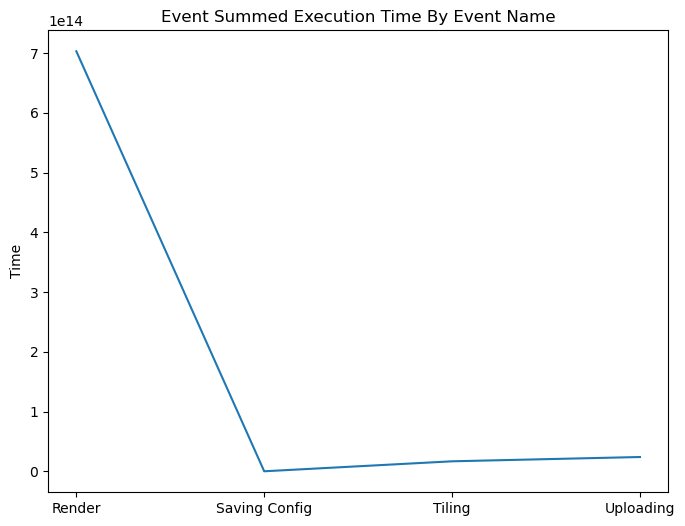

In [163]:
# sum execution times
plt.plot(sum_events)
plt.ylabel('Time')
plt.title('Event Summed Execution Time By Event Name')
#plt.rcParams['figure.figsize'] = [15, 8]

In [50]:
# Storing gpu temp and power as x and y variable for plotting
x = df_gpu.gpuTempC
y = df_gpu.powerDrawWatt

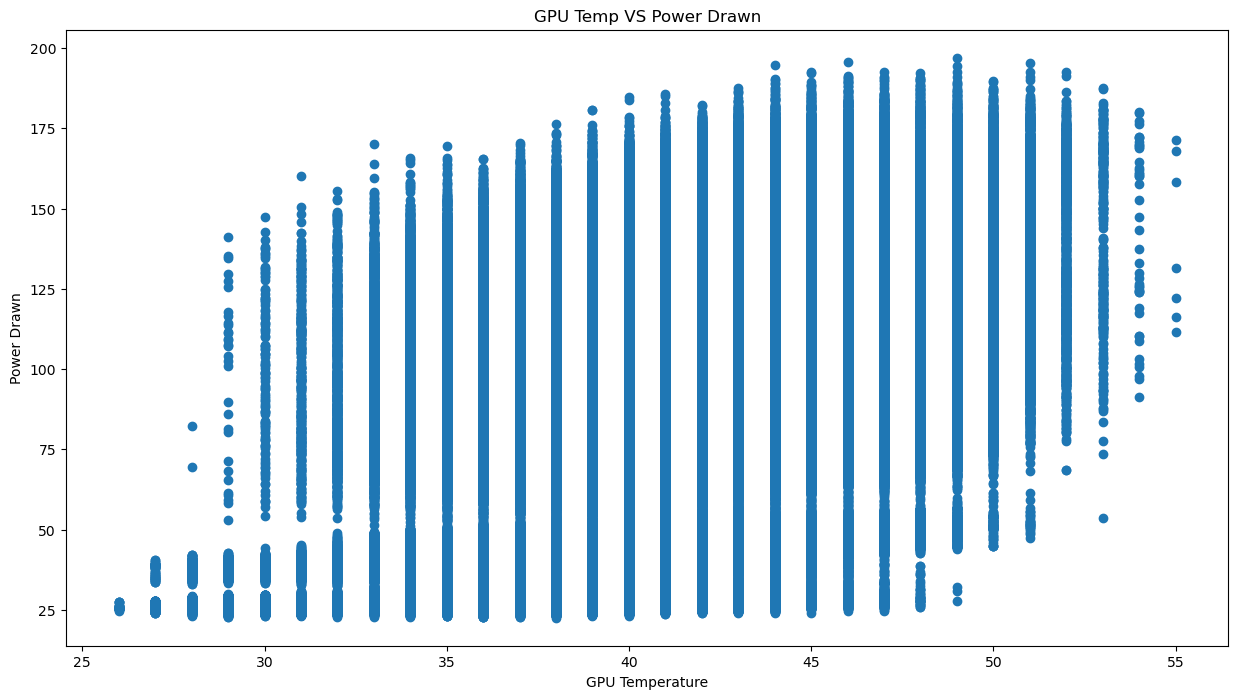

In [51]:
# Plotting scatter plot
plt.scatter(x,y)
plt.xlabel('GPU Temperature')
plt.ylabel('Power Drawn')
plt.title('GPU Temp VS Power Drawn')

# Defining chart size
plt.rcParams['figure.figsize'] = [10, 6]

# Saving Image
# plt.savefig('Images/temp-power.png')
plt.show()

In [52]:
# Storing gpu memory utility % and utility % as x and y variable for plotting
x = df_gpu.gpuMemUtilPerc
y = df_gpu.gpuUtilPerc

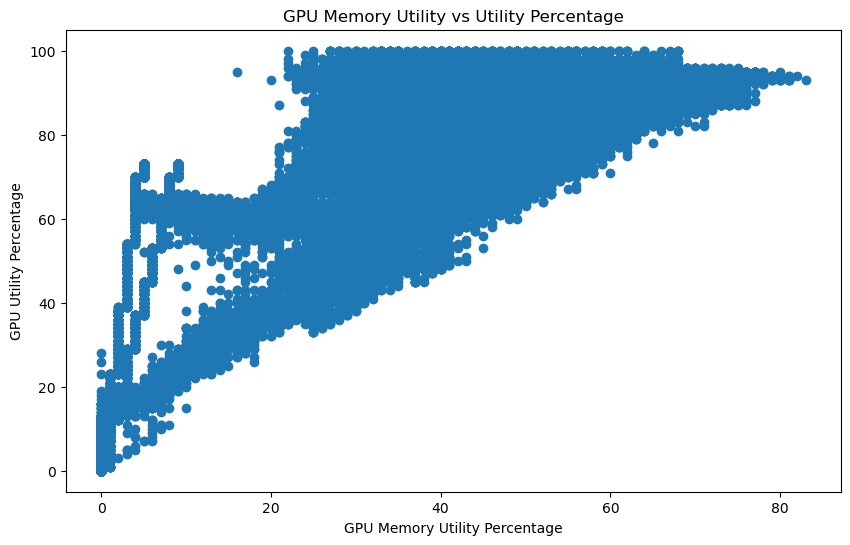

In [53]:
# Plotting scatter plot
plt.scatter(x,y)
plt.xlabel('GPU Memory Utility Percentage')
plt.ylabel('GPU Utility Percentage')
plt.title('GPU Memory Utility vs Utility Percentage')

# Defining chart size
plt.rcParams['figure.figsize'] = [10, 6]

# Saving Image
# plt.savefig('Images/mem-utility.png')
plt.show()

# wjhnkhnk

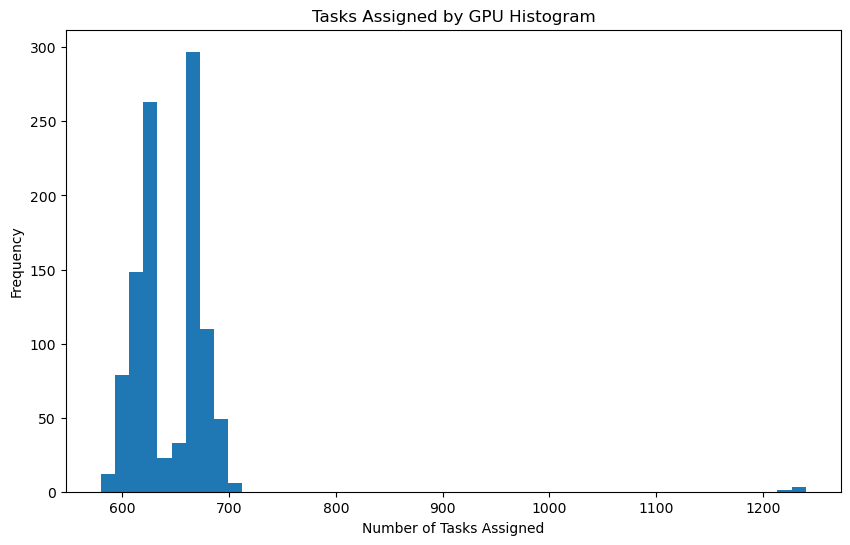

In [54]:
df_app_task['hostname'].value_counts().plot(kind = 'hist', bins=50)
plt.xlabel('Number of Tasks Assigned')
plt.title('Tasks Assigned per GPU Histogram')
plt.rcParams['figure.figsize'] = [15, 8]
# plt.savefig('/tasks-histo.png') # save figure
plt.show()


In [55]:
df_gpu.describe()

,gpuSerial,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
count,1.543663e+06,1.543663e+06,1.543663e+06,1.543663e+06,1.543663e+06
mean,3.239836e+11,8.919851e+01,4.007562e+01,6.305822e+01,3.341360e+01
std,1.228836e+09,3.975741e+01,3.800256e+00,4.144813e+01,2.300106e+01
min,3.201181e+11,2.255000e+01,2.600000e+01,0.000000e+00,0.000000e+00
25%,3.236170e+11,4.499000e+01,3.800000e+01,0.000000e+00,0.000000e+00
50%,3.236170e+11,9.659000e+01,4.000000e+01,8.900000e+01,4.300000e+01
75%,3.250170e+11,1.213400e+02,4.200000e+01,9.200000e+01,5.100000e+01
max,3.252171e+11,1.970100e+02,5.500000e+01,1.000000e+02,8.300000e+01


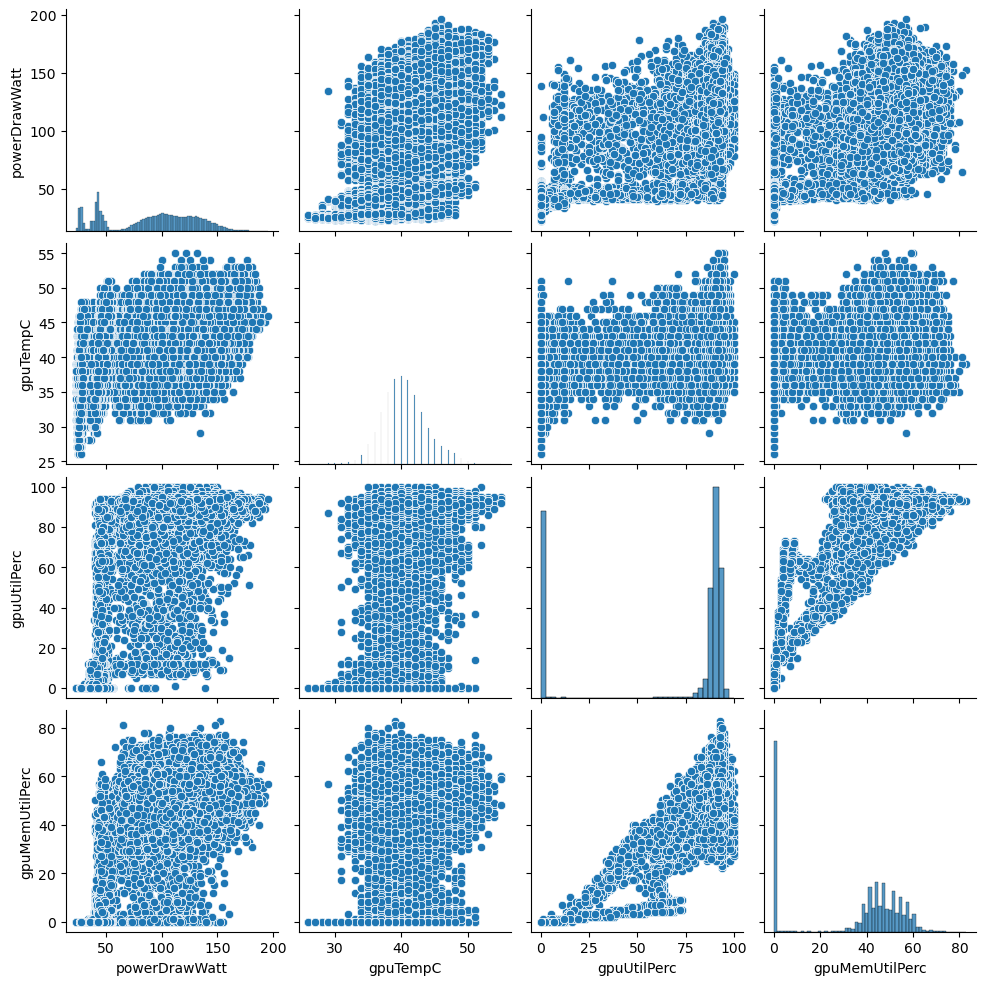

In [84]:
matrix_corr = df_merged.iloc[:,4:8]
sns.pairplot(matrix_corr)

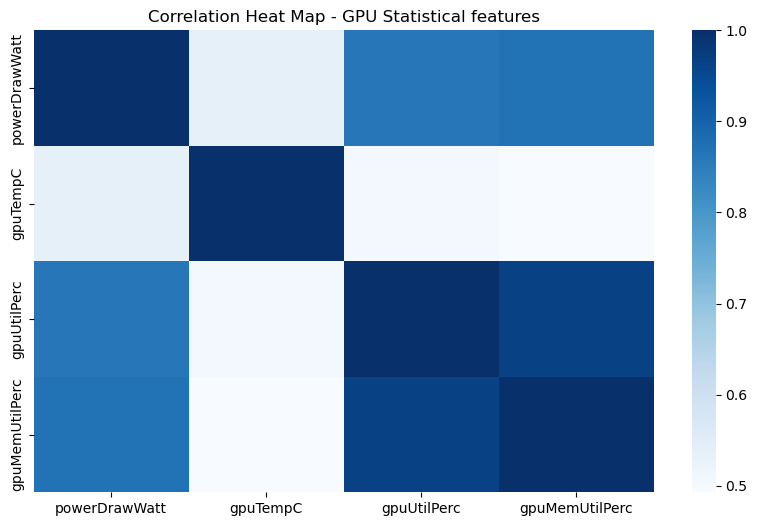

In [60]:
# Seperating numerical columns needed to find correlation
gpu_corr = df_gpu.iloc[:,4:8]
# Plotting Heat Map
plt.figure(figsize=(10, 6))
sns.heatmap(gpu_corr.corr(),cmap='Blues',annot=False)
plt.title('Correlation Heat Map - GPU Statistical features')
plt.show()


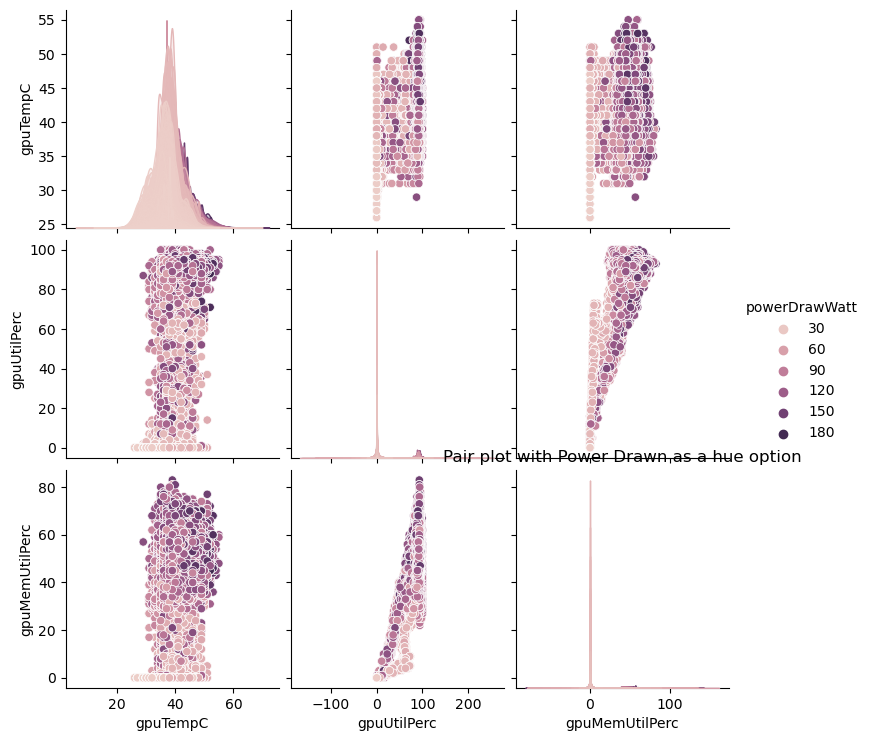

In [85]:
sns.pairplot(matrix_corr, hue ='powerDrawWatt')
plt.title("Pair plot with Power Drawn as a hue option")
plt.show()

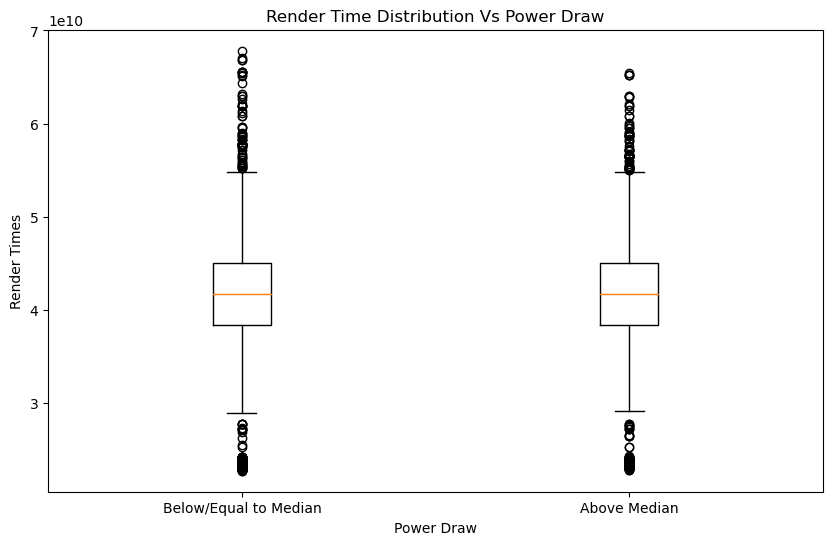

In [112]:
#Render Execution Times By Power Draw

power_median = statistics.median(df['powerDrawWatt_x'])

render_deltas_under = df[
(df['powerDrawWatt_x'] <= power_median) &
(df['eventName'] == 'Render')].groupby(
['eventName']).apply(lambda x: x.stop_time - x.start_time)

render_deltas_above = df[
(df['powerDrawWatt_x'] > power_median) &
(df['eventName'] == 'Render')].groupby(
['eventName']).apply(lambda x: x.stop_time - x.start_time)

plt.boxplot([render_deltas_under.sum(), render_deltas_above.sum()])
# labels
plt.title('Render Time Distribution Vs Power Draw')
plt.ylabel('Render Times')
plt.xlabel('Power Draw')
median_label = ['Below/Equal to Median', 'Above Median']

plt.xticks([1,2], median_label)
plt.rcParams['figure.figsize'] = [10, 6]
plt.show()


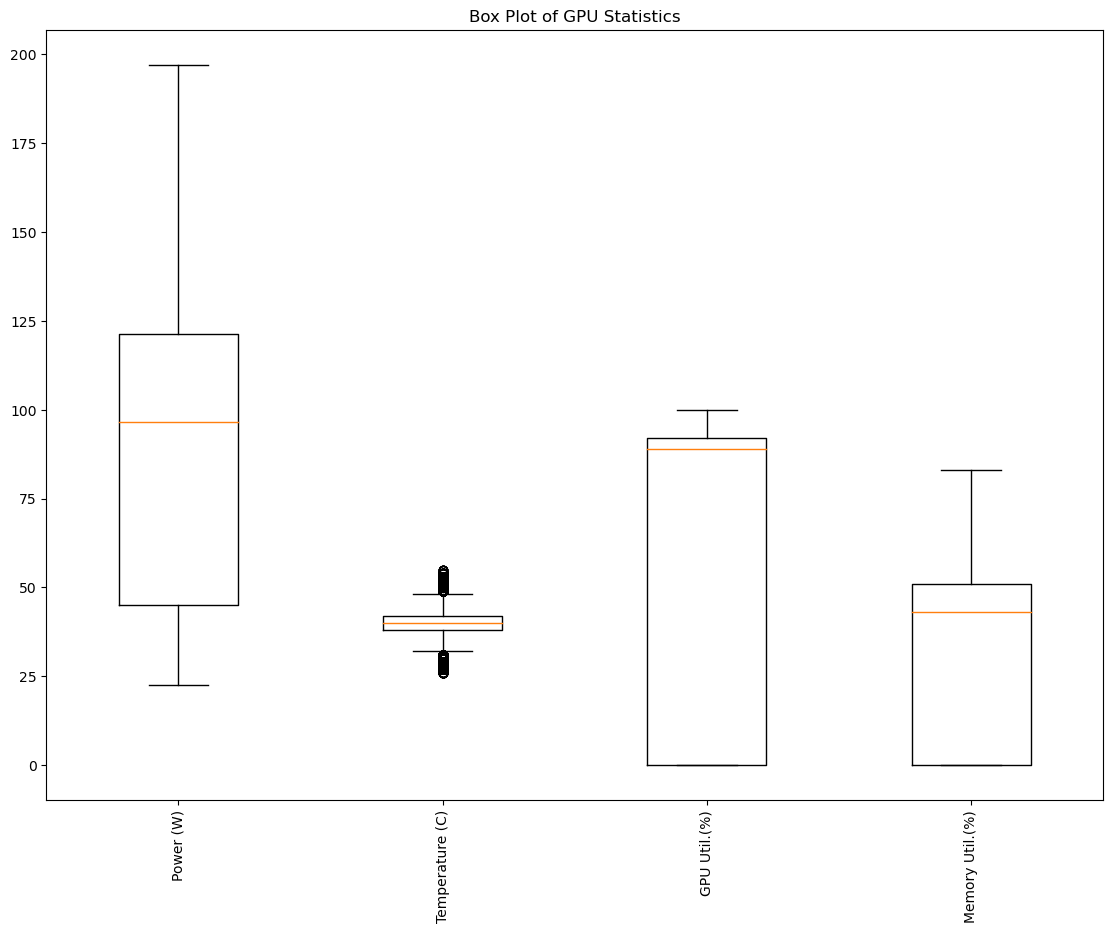

In [122]:
#Analyzing GPU Hardware performance visually
gpu_stats = ['Power (W)','Temperature (C)','GPU Util.(%)','Memory Util.(%)']

plt.subplot(1, 2, 1)
plt.boxplot([df_gpu['powerDrawWatt'], df_gpu['gpuTempC'],
df_gpu['gpuUtilPerc'], df_gpu['gpuMemUtilPerc']])

# Add labels
plt.xticks([i+1 for i, x in enumerate(gpu_stats)],
gpu_stats, rotation='vertical')

# Plot Title
plt.title('Box Plot of GPU Statistics')
plt.rcParams['figure.figsize'] = [30, 10]

# Saving Image
# plt.savefig('Images/Box-plot.png')
plt.show()

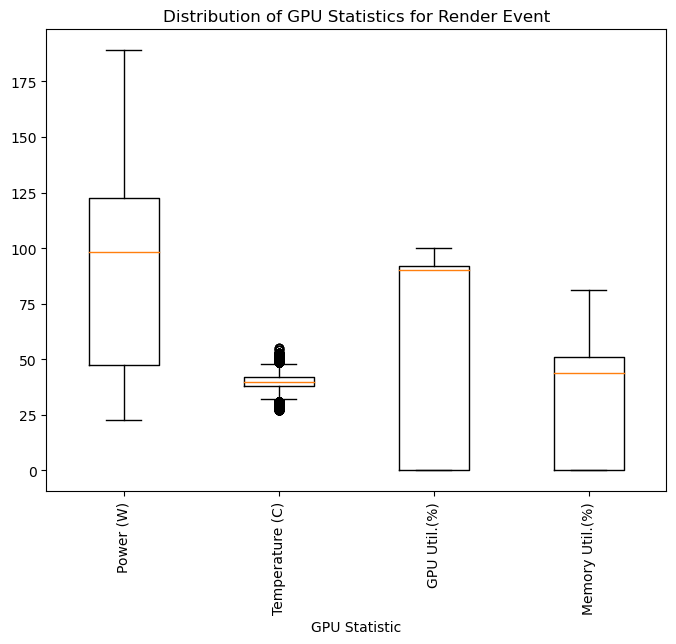

In [130]:
#GPU Statistics by Event Name
#1. Rendering:-
    
# group by statistic
plt.boxplot(
[df_merged[df_merged['eventName'] == 'Render']['powerDrawWatt'],
df_merged[df_merged['eventName'] == 'Render']['gpuTempC'],
df_merged[df_merged['eventName'] == 'Render']['gpuUtilPerc'],
df_merged[df_merged['eventName'] == 'Render']['gpuMemUtilPerc']])
# setup labels and titles
plt.title('Distribution of GPU Statistics for Render Event')
plt.xlabel('GPU Statistic')
plt.xticks([i+1 for i, _ in enumerate(gpu_stats)],
gpu_stats, rotation='vertical')
# draw plot
plt.rcParams['figure.figsize'] = [20, 8]
plt.show()

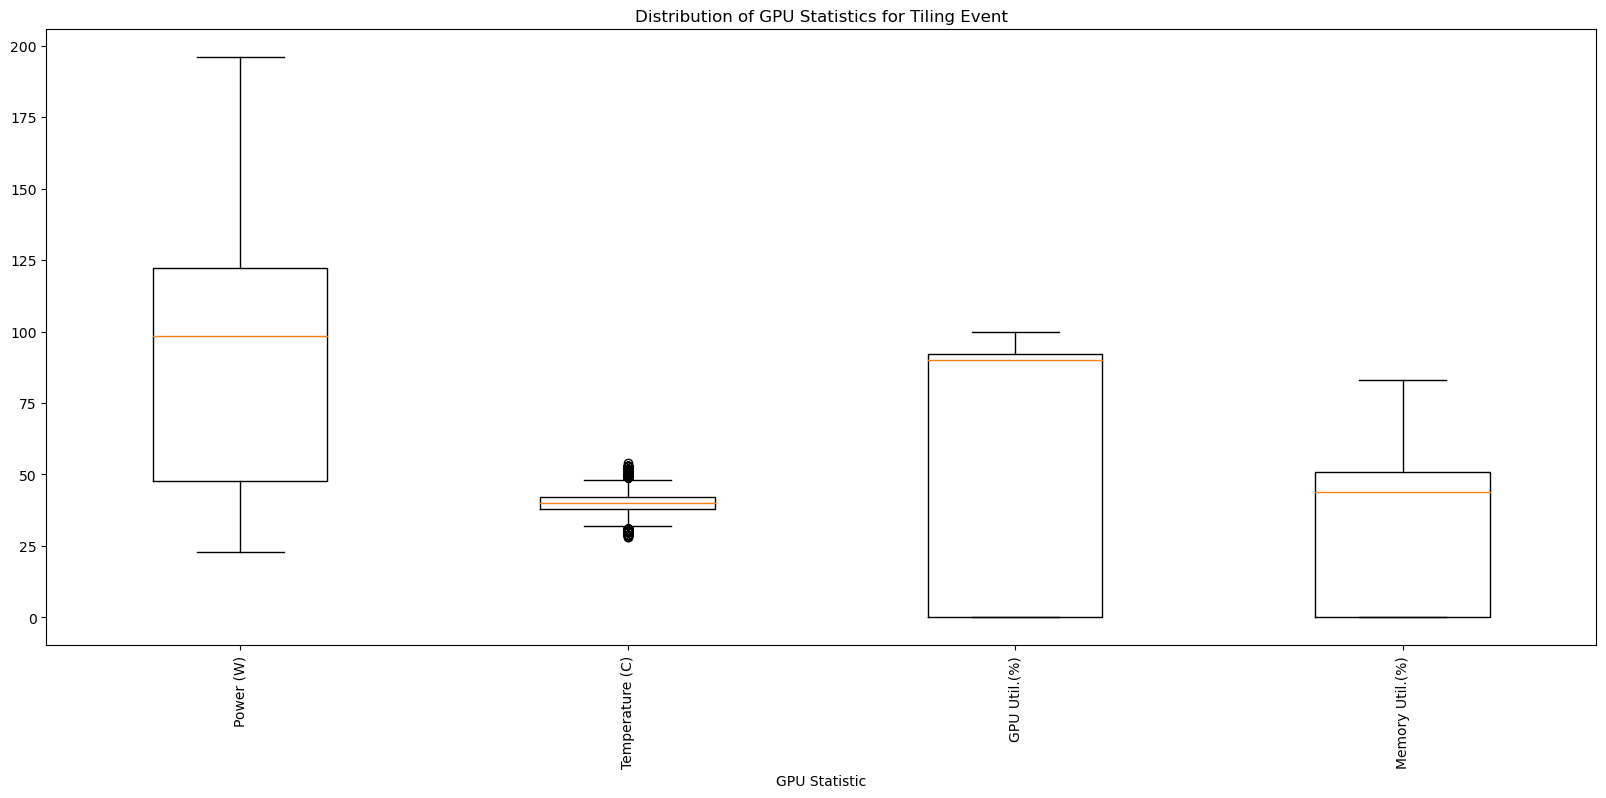

In [134]:
# group by statistic
plt.boxplot(
[df_merged[df_merged['eventName'] == 'Tiling']['powerDrawWatt'],
df_merged[df_merged['eventName'] == 'Tiling']['gpuTempC'],
df_merged[df_merged['eventName'] == 'Tiling']['gpuUtilPerc'],
df_merged[df_merged['eventName'] == 'Tiling']['gpuMemUtilPerc']])
# setup labels and titles
plt.title('Distribution of GPU Statistics for Tiling Event')
plt.xlabel('GPU Statistic')
plt.xticks([i+1 for i, _ in enumerate(gpu_stats)],
gpu_stats, rotation='vertical')
# draw plot
plt.rcParams['figure.figsize'] = [8, 6]
plt.show()